In [11]:
from config import config
from qm.qua import program,for_,stream_processing,declare,declare_stream,wait,measure,play,save,fixed,demod,amp,ramp, align
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm import SimulationConfig
import time as time
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import numpy as np


qmm = QuantumMachinesManager(host='192.168.15.128',port=80)
qmm.close_all_quantum_machines()
qm = qmm.open_qm(config)




with program() as sprog:
    var=declare(fixed,value=np.linspace(-0.1,0.3,5))
    ind=declare(int)
    I=declare(fixed)
    Q=declare(fixed)
    with for_(ind,0,ind<5,ind+1):
        # align('Q1_readout','Q1_L')
        
        play('CW'*amp(0.1), 'Q1_L', duration=100//4)
        measure('readout_pulse_0_05', 'Q2_readout', None, demod.full('cos', I , 'out1'), demod.full('sin', Q , 'out1'))
        # play('CW'*amp(-var[ind]), 'Q1_L', duration=100//4)
    


job = qm.simulate(sprog, SimulationConfig(int(3000//4)))
samples = job.get_simulated_samples()
samples.con1.plot()


2022-04-20 17:30:27,609 - qm - INFO - Performing health check
2022-04-20 17:30:27,612 - qm - INFO - Health check passed
2022-04-20 17:30:27,770 - qm - INFO - to simulate a program, use QuantumMachinesManager.simulate(..)
2022-04-20 17:30:27,815 - qm - INFO - Flags: 
2022-04-20 17:30:27,816 - qm - INFO - Simulating program
Error in callback <function flush_figures at 0x000002984AC58B80> (for post_execute):


KeyboardInterrupt: 

# just testing the pulser part

2022-04-21 10:38:42,457 - qm - INFO - Performing health check
2022-04-21 10:38:42,461 - qm - INFO - Health check passed
quantum machine opened with channels ['Q1_R', 'Q1_L', 'Q1_readout', 'Q2_readout']
default value for CW is: 0.1
2022-04-21 10:38:42,524 - qm - INFO - to simulate a program, use QuantumMachinesManager.simulate(..)
2022-04-21 10:38:42,566 - qm - INFO - Flags: 
2022-04-21 10:38:42,567 - qm - INFO - Simulating program


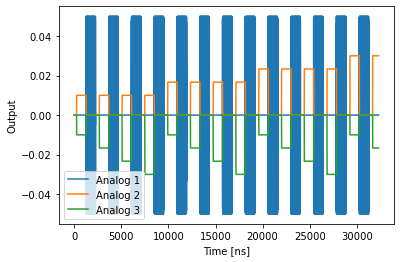

In [1]:
def hold_action(channel,time,looped=False):
    return {'action':'hold' , 'channel':channel , 'action_variables':{'time':time},'looped':looped}

def step_action(channel,value,time,looped=False,looped_variable='step_value',loop_index=0):
    return {'action':'step' , 'channel':channel , 'action_variables':{'time':time,'step_value':value},'looped':looped,'looper':looped_variable,'loop_index':loop_index}

def ramp_action(channel,rate,time,looped=False):
    return {'action':'ramp' , 'channel':channel , 'action_variables':{'time':time,'rate':rate},'looped':looped}

def meas_action(channel,type='full',pulse='readout_pulse_0_05',looped=False):
    return {'action':'meas' , 'channel':channel , 'action_variables':{'type':type , 'pulse':pulse},'looped':looped}


from QMachine.qmachine.pulse_generator.config import config
from QMachine.qmachine.pulse_generator.pulse_generator import Pulser
import numpy as np
pulse_maker=Pulser(config)

actions_m1={'steps':{
                '1':
                    {'ch1':step_action(channel='ch1',value=np.linspace(0.1,0.3,4),time=1000//4,looped=True,looped_variable='step_value',loop_index='0'),
                    'ch2':step_action('ch2',np.linspace(-0.1,-0.3,4),1000//4,True,'step_value',loop_index='1'),
                    'm1':meas_action('m1')},
                '2':
                    {'ch1':step_action('ch1',np.linspace(-0.1,-0.3,4),1000//4,True,'step_value',loop_index='0'),
                    'ch2':step_action('ch2',np.linspace(0.1,0.3,4),1000//4,True,'step_value',loop_index='1')}},
        'looped':[4,4],
        'channels':['ch1','ch2','m1']}


actions_m2={'steps':{
                '1':
                    {'ch1':step_action('ch1',np.linspace(0.1,0.3,4),1000//4,True,'step_value',loop_index='0'),
                    'ch2':step_action('ch2',np.linspace(-0.1,-0.3,4),1000//4,True,'step_value',loop_index='1')},
                '2':
                    {'ch1':step_action('ch1',np.linspace(-0.1,-0.3,4),1000//4,True,'step_value',loop_index='0'),
                    'ch2':step_action('ch2',np.linspace(0.1,0.3,4),1000//4,True,'step_value',loop_index='1'),
                    'm1':meas_action('m1')}},
        'looped':[4,4],
        'channels':['ch1','ch2','m1']}

# actions={'steps':{
#                 '1':
#                     {'ch1':step_action('ch1',0.1,1000//4,False,'step_value',loop_index='0')},
#                 '2':
#                     {'ch1':step_action('ch1',-0.1,1000//4,False,'step_value',loop_index='0')}},
#         'channels':['ch1']}


# import pprint
# pprint.pprint(actions)

seq=pulse_maker.build_seq(actions_m2)
pulse_maker.simulate_pulse(seq,32000//4+300//4)

In [ ]:
k='ch'
do=False
if ('m' in k or 'ch' in k) and do:
    print('j')